**ÍNDICE DE CONTENIDOS**

1. [Ejercicio 1: Problema de regresión múltiple para predecir la probabilidad de abandono de un banco](#topic1)
2. [Ejercicio 2: Problema de clasificación multiclase de diferentes especies de flores](#topic2)
3. [Ejercicio 3: Problema de clasificación multiclase de diferentes artículos de ropa y calzado](#topic3)



# 01 Ejercicio: Problema de modelización de la pérdida de clientes  <a id="topic1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio tomaremos como punto de partida el caso visto en el Notebook '02_Introducción a las RNA en TensorFlow 2.0'. Partiendo del mismo conjunto de datos, una muestra de 10.000 clientes, programar una estructura de red neuronal artificial con 4 capas ocultas y 3 capas dropout utilizando el proceso de validación cruzada k-fold en la etapa de entrenamiento con el objetivo de identificar si tenemos problemas de sesgo y/o varianza. El resto de parámetros son los que aparecen fijados aunque podéis modificarlos para ver cómo varían los resultados.

Recordad que las fases básicas para implementar dicho algoritmo de aprendizaje profundo son las siguientes:

1. Procesado datos entrada red neuronal artificial
2. Definición del modelo de red neuornal artificial
3. Configuración del proceso de aprendizaje de una RNA
4. Entrenamiento del modelo de red neuronal artificial
5. Evaluación del modelo de red neuronal artificial

**01 Solución ejercicio: Problema de modelización de la pérdida de clientes**

In [ ]:
# Tenemos que instalar unas dependencias previamente (tenemos que hacerlo en cada sesión que queramos utilizar la librería scikeras)
!python -m pip install scikeras

In [91]:
# Importamos las librerías necesarias para realizar dicho ejercicio
import keras
import scikeras
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.utils import class_weight

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Sincronizamos Google Colab con Google Drive

try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception:
    print("No estás en el entorno de Google Colab.")

No estás en el entorno de Google Colab.


In [2]:
# Cargamos el conjunto de datos
dataset = pd.read_csv('./Churn_Modelling.csv')

In [3]:
# Definimos las variables independientes
x = dataset.iloc[:, 3:13].values


In [4]:
# Definimos la variable que queremos explicar (dependiente)
y = dataset.iloc[:, 13].values
print(dataset['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [5]:
# Realizamos la transformación para cada una de las variables que nos interesan
# Transformación de la columna 1 (país) en variable dummy
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])

# Comprobamos que se ha realizado correctamente
x

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [9]:
# Cuando estamos considerando más de 3 categorías y queremos crear variables dummmies
# para no caer en problemas de multicolinealidad debido al exceso de variables creadas artificialmente
# tenemos que eliminar siempre 1 columna. Para ello utilizaremos las funciones OneHotEncoder y ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

x = transformer.fit_transform(x) # aplicamos la función transformer
x = x[:, 1:] # eliminamos la columna 1º

# Comprobamos que se ha realizado correctamente
x[:, 0:3]

array([[0.0, 0.0, 619],
       [0.0, 1.0, 608],
       [0.0, 0.0, 502],
       ...,
       [0.0, 0.0, 709],
       [1.0, 0.0, 772],
       [0.0, 0.0, 792]], dtype=object)

In [10]:
# Transformación de la columna 2 (género) en variable dummy
labelencoder_x_2 = LabelEncoder()
x[:, 3] = labelencoder_x_2.fit_transform(x[:, 3])

In [11]:
# Definimos los conjuntos de train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

Forma de x_train: (8000, 11)
Forma de y_train: (8000,)


### Estandarízación

In [13]:
# Estandarizamos las variables con la función StandardScaler
sc_x = StandardScaler()

# Variables independientes entrenamiento estandarizadas
x_train = sc_x.fit_transform(x_train)


In [14]:
# Variables independientes testing estandarizadas
x_test = sc_x.transform(x_test)

In [15]:

# Averiguamos el número de features para definir la capa de entrada
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

Forma de x_train: (8000, 11)
Forma de y_train: (8000,)


In [ ]:
# Creamos un Dataframe para ir guardando los resultados
results = pd.DataFrame(columns=['Accuracy', 'Variance', 'Precision',  'Recall', 'F1'])

In [86]:

#TODO Creamos una función para implementar la estructura de RNA con:
"""
-4 capas ocultas
-3 capas de dropout
-Proceso de validación cruzada k-fold en la etapa de entrenamiento
para identificar si hay problemas de sesgo o varianza.
"""

def build_rna() -> Sequential:

    """
    ¿Qué utilizas y por qué?
    -Puesto que tenemos 11 features, añadimos el mismo número de nodos en la capa de entrada.
    -Para las capas intermedias utiliamos la media entre la capa ca de entrada y salida.
    -Un solo nodo para la salida y activación sigmoide al ser una clasificación binaria.
    -Reducimos el peso de las capas de dropout, ya que hay sospechas de que están afectando negativamente al modelo.
    -Cambiamos el inicializador de pesos de uniforma he_uniform (recomendado para la activación reul)
    -Cambiamos el inicializador "uniform" a "glorot_unifor" para la capa de salida, recomendado para las sigmoides.
    -En la capa de salida, añadimos como métricas de validación el recall y precisión.

    Estos útimos dos cambios mejoran sustancialmente el recall y precisión.
    """
    rna = Sequential()
    rna.add(Dense(units = 11, kernel_initializer = "he_uniform", activation = "relu", input_dim = 11))
    rna.add(Dense(units = 8, kernel_initializer = "he_uniform",  activation = "relu"))
    rna.add(Dropout(0.1))
    rna.add(Dense(units = 8, kernel_initializer = "he_uniform",  activation = "relu"))
    rna.add(Dropout(0.15))
    rna.add(Dense(units = 8, kernel_initializer = "he_uniform",  activation = "relu"))
    rna.add(Dropout(0.20))
    rna.add(Dense(units = 1, kernel_initializer = "glorot_uniform",  activation = "sigmoid"))
    rna.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = [ "Recall", "Precision"])
    return rna

In [88]:
# Preparamos la RNA al conjunto de entrenamiento para poder utilizar el k-fold cv
# Al aumentar el tamaño del lote (de 50 a 80), también vamos a aumentar el número de épocas.
rna = KerasClassifier(build_fn = build_rna, batch_size = 80, epochs = 130)

### Alternativa al cross_val_score

En el código propuesto para el ejercicio, se utiliza el cross_val_score, tal que así:

```python
                        accuracies = cross_val_score(
                            estimator=rna, 
                            X = x_train, y = y_train, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 1)

                        accuracy = accuracies.mean()
                        variance = accuracies.std()

                        print("Media del accuracy: ", accuracy) # sesgo / bias 
                        print("Varianza", variance) # varianza 

```

Durante los primeros entrenamientos, aún teniendo una accuracy relativamente alto, fue posible advertir que la clasificación no estaba siendo del todo correcta, y es que este enfoque no tiene en cuenta que la muestra está completamente desblanceada (hay pocos clientes que se van a ir). 

Así que como alternativa propoonemos un cross_validate, que además del accuracy, nos permitirá tener en cuenta la precisión, el recall y el f1 de nuestra validación cruzada, entrenando la red neuronal de una forma mucho más eficiente.

In [89]:
"""
Con un cv=10 -punto del que partíamos- se está produnciendo una división de 10 pliegues.
Esto quiere decir que cada pliegue tendrá 800 muestras. 

Sin emabargo, el dataset contiene un 20% de positivos, lo que significa que quizás con 10 pliegues 
no capture demasiado bien la clase minoritaria. Para ajustar el modelo, lo reduciremos a solo 5 pliegues.
"""

# Realizamos la validación cruzada con múltiples métricas
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Como vemos, únicamente añadimos más parámetros de medición a la validación cruzada
scores = cross_validate(
    estimator=rna, 
    X=x_train, y=y_train, 
    cv=5, 
    scoring=scoring, 
    n_jobs=-1, # Paralelización, afecta al rendimiento. NO TOCAR
    verbose=2 # 1 para pocos mensajes por consola, 2 para tener información detallada
)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.6s remaining:   53.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.8s finished


### Funcionamiento de cross_validate

La validación cruzada de scores (cross_validate) nos devuelve un diccionario donde cada clave del diccionario
contendrá un array con tantos índices como pliegues le hayamos indicado dentro del cv. Para obtener las métricas de validación, será necesario calcular la media o la desviación estándar de cada clave.

In [90]:


accuracy = scores['test_accuracy'].mean()
variance = scores['test_accuracy'].std()
precision = scores['test_precision'].mean()
recall = scores['test_recall'].mean()
f1 = scores['test_f1'].mean()

# Crear un DataFrame con la nueva fila de resultados
new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'F1': [f1],
    'Recall': [recall]
})

# Concatenar el nuevo DataFrame al anterior
results = pd.concat([results, new_row], ignore_index=True)

# Mostrar el DataFrame resultante
results

,Accuracy,Variance,Precision,Recall,F1
0,0.856625,0.005025,0.743078,0.457132,0.565185
1,0.850125,0.007020,0.718834,0.436305,0.542542
2,0.854625,0.003945,0.732700,0.456554,0.559824
3,0.854875,0.005948,0.732893,0.454723,0.559672


In [29]:
scores

{'fit_time': array([65.04563856, 65.14037657, 71.00909948, 73.51092243, 73.33638859,
        74.19309735, 70.94028211, 75.69607711, 39.43485093, 38.64616632]),
 'score_time': array([0.47971129, 0.52858758, 0.51362586, 0.36602092, 0.42985034,
        0.33011937, 0.59042192, 0.34108901, 0.11316228, 0.17384601]),
 'test_accuracy': array([0.84625, 0.8375 , 0.8375 , 0.83625, 0.8475 , 0.825  , 0.79625,
        0.84875, 0.8125 , 0.8675 ]),
 'test_precision': array([0.65151515, 0.73239437, 0.68539326, 0.75      , 0.6952381 ,
        0.70175439, 0.        , 0.69444444, 0.62962963, 0.73387097]),
 'test_recall': array([0.52760736, 0.3190184 , 0.37423313, 0.29447853, 0.44785276,
        0.24539877, 0.        , 0.4601227 , 0.20731707, 0.55487805]),
 'test_f1': array([0.58305085, 0.44444444, 0.48412698, 0.42290749, 0.54477612,
        0.36363636, 0.        , 0.55350554, 0.31192661, 0.63194444])}

### Reconsiderando la validación cruzada

Hasta aquí las métricas de bias y varianza son bastante buenas.... ¿Pero realmente están interpretando bien los datos? 

1. Si el modelo tiene un alto sesgo (es decir, el accuracy es bajo) (lo que significa que tiene un error de entrenamiento alto), esto podría sugerir que tu modelo es demasiado simple y no puede capturar la complejidad de los datos. Esto se conoce como underfitting. Esto sucedería si en la media del accuracy tuviésemos un valor bajo, como del 0.70 o 0.60.

2. Si el modelo tiene una alta varianza (lo que significa que tiene una gran diferencia entre el error de entrenamiento y el error de prueba), es posible que haya overfitting. Cuánto más alta sea la varianza, más es la distancia que hay entre el valor de la predicción y el valor real.

Nosotros no nos enfrentamos a ninguna de estas situaciones, ya que el problema está en la clasificación de falsos positivos y falsos negativos. Así que vamos a probar con un nuevo enfoque.

Para seguir profundizando en esta problemática, descartamos la validación cruzada y vamos a obtener las métricas trabajando directamente con el modelo.


In [46]:

# Entrenamos el modelo
rna.fit(x_train, y_train)

# Hacemos las predicciones sobre los datos de prueba
y_pred = rna.predict(x_test)

# Convertimos las predicciones y los datos reales a un formato adecuado
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()



c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.4106 - Precision: 0.1849 - Recall: 0.5482 - loss: 0.8489
Epoch 2/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7650 - Precision: 0.1831 - Recall: 0.0541 - loss: 0.5373
Epoch 3/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7960 - Precision: 0.1900 - Recall: 0.0059 - loss: 0.4851     
Epoch 4/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7973 - Precision: 0.3192 - Recall: 0.0053 - loss: 0.4676     
Epoch 5/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7935 - Precision: 0.3273 - Recall: 0.0036 - loss: 0.4626     
Epoch 6/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7894 - Precision: 0.4600 - Recall: 0.0023 - loss: 0.4630     
Epoch 7/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.7925 - Precision: 0.6508 - Recall: 0.0073 - loss: 0.4560     
Epoch 8/120
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.8004 - Precision: 0.7553 - Recall: 0.005

In [47]:
accuracy = accuracy_score(y_test, y_pred)
variance = np.var(y_pred)

precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Crear un DataFrame con la nueva fila de resultados
new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'F1': [f1],
    'Recall': [recall]
})

# Concatenar el nuevo DataFrame al anterior
results = pd.concat([results, new_row], ignore_index=True)

# Mostrar el DataFrame resultante
results

,Accuracy,Variance,Precision,Recall,F1
0,0.8535,0.008782,0.742369,0.440562,0.550056
1,0.8570,0.004815,0.746024,0.454676,0.564146
2,0.8535,0.134400,0.675000,0.533333,0.595862


### Matriz de confusión y curva ROC

El modelo tiene claros problemas para identificar positivos (es decir, del total de clientes que pretenden marcharse, ¿cuántos están siendo identificados correctamente?). Con un 53% como mejor resultado hasta ahora, estaríamos perdiendo a la mitad de los clientes que se van a ir. 

por su parte, tenemos una precisión que ronda el 70%, esto quiere decir que algunos clientes que se no pretenden irse, están siendo clasificados como clientes que se van a ir (una situación que no es tan grave como la anterior).

A falta de ideas sobre qué está fallando en el modelo, vamos a profundizar más en las métricas obteniendo la matriz de confusión y la curva de ROC.

**NOTA** 
1. Precisión (precision): De todos los que fueron predichos como positivos, ¿cuántos realmente lo son?
2. Recall (sensibilidad): De TODOS los positivos del modelo, ¿cuántos fueron caputrados como positivos?
3. F1: La media de una cosa y la otra. Es decir, la media armónica entre la precisión y el recall.

[[1491  104]
 [ 189  216]]


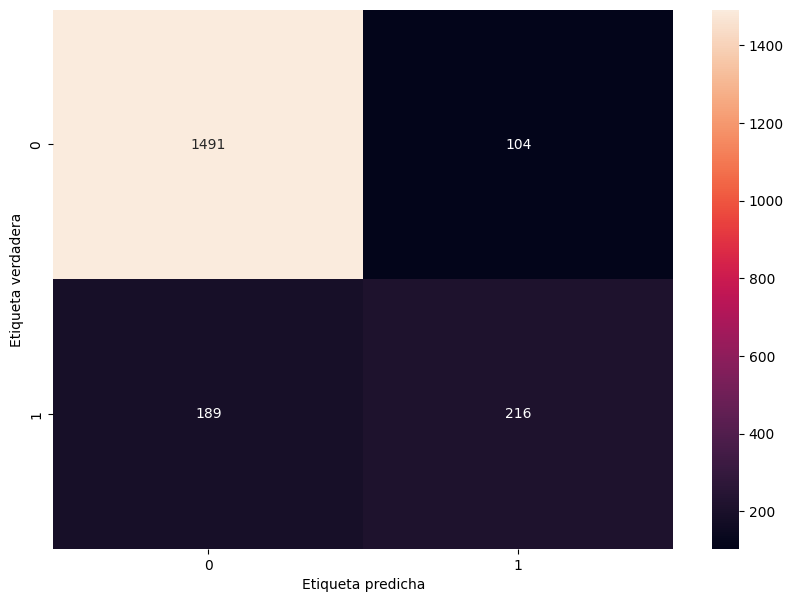

In [116]:


# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

### Curva de ROC

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC: 0.857019234490499


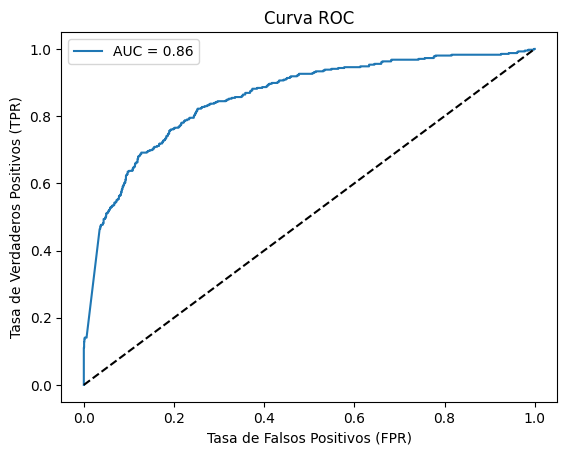

In [49]:
# Predicciones probabilísticas
y_pred_proba = rna.predict_proba(x_test)[:, 1]

# Cálculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Cálculo del AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Gráfico de la curva ROC
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia (clasificación aleatoria)
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="best")
plt.show()

### Obtención "manual" de las métricas

Con el objetivo de ver si podemos mejorar el recall del problema, vamos a crear la red neuronal manualmente y vamos a prescindir de la validación cruzada.

Además, vamos a remuestrear la clase minoritaria para ver si conseguimos detectar mejor los positivos.

In [117]:
rna_2 = Sequential()
rna_2.add(Dense(units = 11, kernel_initializer = "he_uniform", activation = "relu", input_dim = 11))
rna_2.add(Dense(units = 6, kernel_initializer = "he_uniform",  activation = "relu"))
rna_2.add(Dropout(0.05))
rna_2.add(Dense(units = 6, kernel_initializer = "he_uniform",  activation = "relu"))
rna_2.add(Dropout(0.1))
rna_2.add(Dense(units = 6, kernel_initializer = "he_uniform",  activation = "relu"))
rna_2.add(Dropout(0.15))
rna_2.add(Dense(units = 1, kernel_initializer = "glorot_uniform",  activation = "sigmoid"))
rna_2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy", "Recall", "Precision"])

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
from imblearn.over_sampling import SMOTE

"""
Vamos a utilizar una librería externa, Imbalanced Learn, para realizar un sobremuestreo de la clase minoritaria, 
que es lo que parece que está provocando la baja precisión y recall.

"""

smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

history = rna_2.fit(x_train_res, y_train_res, validation_data=(x_test, y_test), epochs=100, batch_size=50)



Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.5061 - Recall: 0.6918 - accuracy: 0.5034 - loss: 0.8062 - val_Precision: 0.2628 - val_Recall: 0.5432 - val_accuracy: 0.5990 - val_loss: 0.6897
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.5678 - Recall: 0.6694 - accuracy: 0.5783 - loss: 0.6833 - val_Precision: 0.2992 - val_Recall: 0.8444 - val_accuracy: 0.5680 - val_loss: 0.6944
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6228 - Recall: 0.7431 - accuracy: 0.6477 - loss: 0.6435 - val_Precision: 0.3758 - val_Recall: 0.7580 - val_accuracy: 0.6960 - val_loss: 0.6468
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.7040 - Recall: 0.6702 - accuracy: 0.6951 - loss: 0.6107 - val_Precision: 0.4483 - val_Recall: 0.7284 - val_accuracy: 0.7635 - val_loss: 0.5989
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.7492 - Recall: 0.6576 - accuracy: 0.7178 - loss: 0.5857 - val_Precision: 0.4708 - val_Re

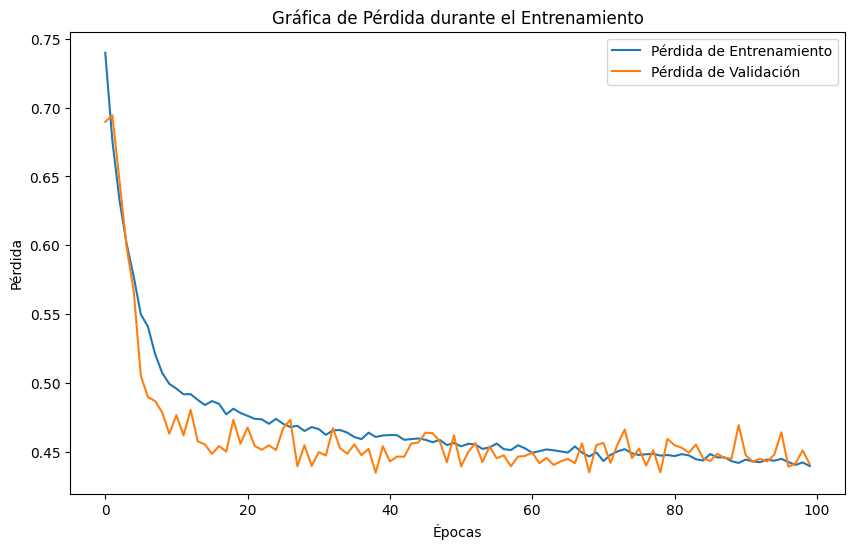

In [119]:
# Graficar la pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Gráfica de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



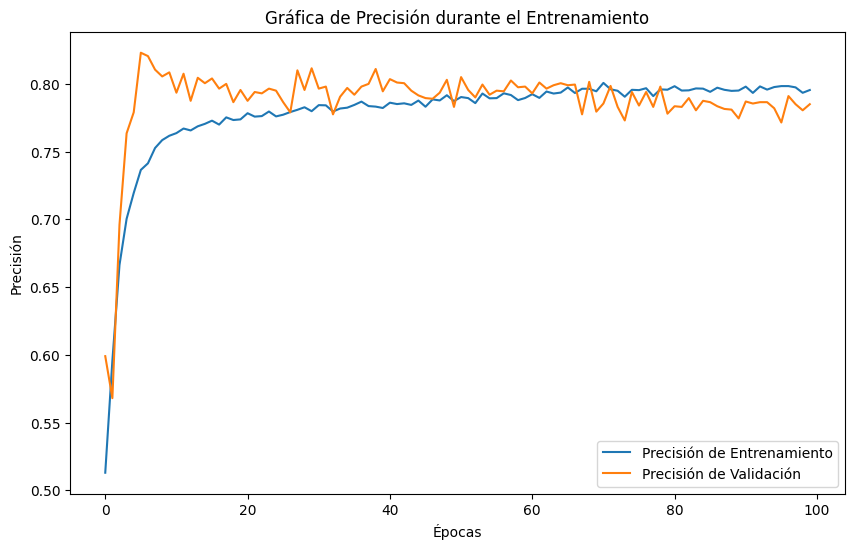

In [120]:
# Graficar la precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Gráfica de Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [121]:
results = rna_2.evaluate(x_test, y_test)
print(f'Pérdida: {results[0]}')
print(f'Precisión: {results[1]}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.5056 - Recall: 0.7832 - accuracy: 0.7952 - loss: 0.4337  
Pérdida: 0.441192090511322
Precisión: 0.7850000262260437


No parece que con más de 100 epochs el modelo vaya a mejorar. Lo cuál nos lleva a pensar que el problema no es de falta de entrenamiento.

Sin embargo, con una precisión que supera el 85%, nos podemos dar por satisfechos.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1271  324]
 [ 106  299]]


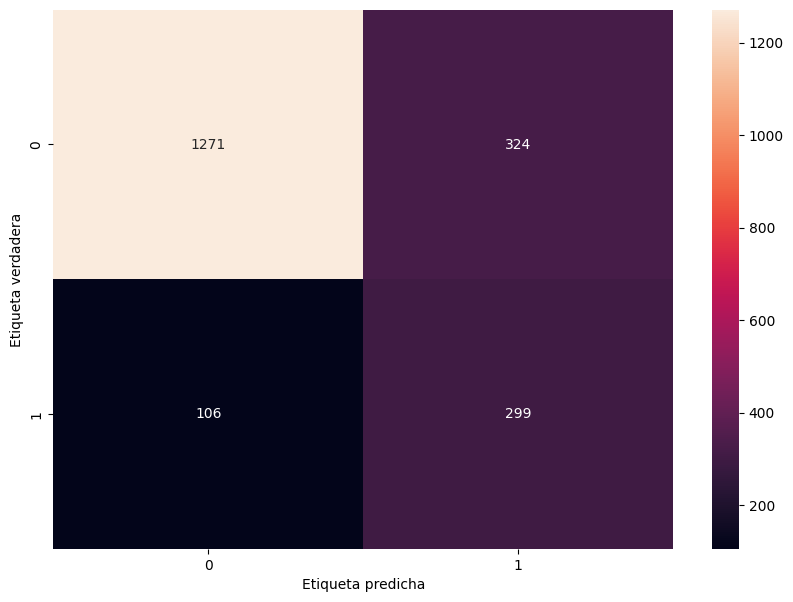

In [122]:
y_pred_2 = rna_2.predict(x_test)

cm = confusion_matrix(y_test, y_pred_2 > 0.5)

print(cm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

Finalmente obtenemos un resultado más satisfactorio. Efectivamente, hemos pedido un poco de accuracy y la función de pérdida aumenta ligeramente. Sin embargo, hemos conseguido detectar a un mayor número de verdaderos positivos. En este caso, hemos perdido precisión, ya que también tenemos muchos más falsos positivos.

Sin embargo, teniendo en cuenta las características del problema (perder el menor número posible de clientes), quizás esta sea la mejor resolución posible con los datos que tenemos disponibles. 

# 02 Ejercicio: Problema de clasificación multiclase de diferentes especies de flores <a id="topic2"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio utilizaremos el conjunto de datos de flores denominado *iris* que utilizamos también en la asignatura de análisis estadístico. Este conjunto de datos está bien estudiado y es un buen problema para practicar con redes neuronales ya que las 4 variables de entrada son numéricas y tienen la misma escala en centímetros. Cada observación describe las propiedades de las medidas de una flor observada y la variable de salida será la especie específica de iris.

Se trata de un problema de clasificación multiclase, lo que significa que hay más de dos clases que predecir, de hecho, vamos a considerar tres especies de flores. Se trata de un tipo de problema importante en el que practicar con redes neuronales porque los valores de las tres clases requieren un manejo especializado. El objetivo será proponer la estructura de una red neuronal artificial que proporcione una precisión elevada del conjunto de prueba (> 85%).

**02 Solución ejercicio: Problema de clasificación multiclase de diferentes especies de flores**

In [ ]:
# Tenemos que instalar unas dependencias previamente (tenemos que hacerlo en cada sesión que queramos utilizar la librería scikeras)
!python -m pip install scikeras

In [123]:
# Importamos las librerías necesarias para realizar dicho ejercicio
import scikeras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [126]:

try:
    drive.mount('/content/drive')
    from google.colab import drive
except Exception:
    print("No estás en el entorno de Google Colab ;)")

No estás en el entorno de Google Colab ;)


In [127]:
# Cargamos el conjunto de datos
dataset = pd.read_csv('./iris.csv')

In [128]:
# Definimos las variables independientes
x = dataset.iloc[:, 0:4].values

# Comprobamos que hemos realizado correctamente la selección
print("x: ", x)
print("x ndim: ", x.ndim)
print("x shape:", x.shape)
print("x size: ", x.size)
print("x dtype: ", x.dtype)

x:  [[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.

In [129]:
# Definimos la variable dependiente
y = dataset.iloc[:, 4].values

# Comprobamos que hemos realizado correctamente la selección
print("y: ", y)
print("y ndim: ", y.ndim)
print("y shape:", y.shape)
print("y size: ", y.size)
print("y dtype: ", y.dtype)

y:  ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-ve

In [130]:
# Codificamos los valores de la clase como enteros
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [131]:
# Convertimos los enteros en variables ficticias
dummy_y = np_utils.to_categorical(encoded_y)

# Comprobamos que hemos realizado correctamente la selección
print("dummy_y: ", dummy_y)
print("dummy_y ndim: ", dummy_y.ndim)
print("dummy_y shape:", dummy_y.shape)
print("dummy_y size: ", dummy_y.size)
print("dummy_y dtype: ", dummy_y.dtype)

dummy_y:  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1

In [142]:
# Definimos la arquitectura del modelo de RNA
def base_model():
    """
    ¿Qué utilizas y por qué?

    -Tenemos 4 variables independientes, así que hay 4 nodos de entrada.
    
    -En las capas intermedias comenzamos usando 4 nodos (la media entre la entrada y la salida).

    -Comenzamos sin ninguna capa oculta para ver cómo se comporta el modelo. En caso de overfitting, añadiríamos alguna de dropout.

    -En la capa de salida hay 3 posibles categorías, así que solo necesitamos 3 nodos.
    
    -Este no es un problema de clasificación binario como el anterior, así que utilizamos softmax en lugar de la sigmoide.
    En caso de usar la sigmoide, no podríamos garantizar que los pesos de cada categoría sumen 1. La softmax nos garantiza esto.


    -El dataset de iris está muy balanceado (todo lo contrario que el ejercicio anterior), así que en un principio no sería necesario incluir 
    la sensabilidad y la precisión. Aún así, y solamente para evaluar, se ha decidido incluir.
    """
    rna = Sequential()
    rna.add(Dense(units = 4, input_dim=4, activation='relu'))
    rna.add(Dense(units = 4, activation='relu'))
    rna.add(Dense(units = 4, activation='relu'))
    rna.add(Dense(units = 3, activation='softmax'))
    rna.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy", "Recall", "Precision"])
    return rna

In [143]:
# Realizamos la fase de entrenamiento con k-fold cv (k=10)
model = KerasClassifier(build_fn = base_model, batch_size = 5, epochs = 100)

### Analizando el dataset

El dataset de Iris, como podemos ver, solamente tiene 150 muestras. Esto puede ser insuficiente y ha resultado ser especialmente conflictivo a la hora de aplicar el crossvalidation. Para disminuir este efecto, se ha reducido el número de pliegues a solamente 3 (esto nos daría 3 lotes de 50). 

Eso sí, de las pruebas realizadas, y como veremos más adelante, las mejores predicciones se realizan cuando no hay una validaciónc cruzada como tal, sino que directamente se hace la comprobación con el conjunto de test.

In [144]:
#Aquí podemos ver que quizás no hay suficientes datos para hacer demasiados pliegues
x.shape

(149, 4)

In [145]:
# Hacmeos la validación con solo 3 pliegues
results = cross_val_score(model, x, dummy_y, cv=3)

Epoch 1/100


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3110 - loss: 1.0958    
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5017 - loss: 1.0853 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4716 - loss: 1.0752 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4938 - loss: 1.0654 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5558 - loss: 1.0560 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5257 - loss: 1.0469 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4688 - loss: 1.0384 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0060 - loss: 1.3192    
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1464 - loss: 1.1406 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4082 - loss: 1.0695 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4380 - loss: 1.0314 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7723 - loss: 0.9965 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.9533 - loss: 0.9610 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.9449 - loss: 0.9205 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.2857 - Recall: 0.0098 - ac

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2219 - loss: 1.1035    
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4663 - loss: 1.0750 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4203 - loss: 1.0529 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4961 - loss: 1.0220 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5146 - loss: 0.9719 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4888 - loss: 0.9068 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5626 - loss: 0.8447 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e

In [146]:
accuracy = results.mean()*100
variance = results.std()*100

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Accuracy: ", accuracy)
print("Variance: ", variance)



Baseline: 0.67% (0.94%)
Accuracy:  0.6666666666666667
Variance:  0.9428090415820634


Con un cv=3, conseguimos un accuracy del 0.67. Este es un resultado que dista mucho del objetivo del 85% que nos habíamos propuesto. Vamos a intentar afinar un poco más. Para ello, vamos a aplicar el Cross Validate.

El Cross Validate nos proporcionará las métricas de recall y precisión, que resultarán bastante útiles para ver cuál es el origen del problema.

### Evaluación de métricas con Cross Validate 

In [161]:
#Creamos un dataframe para ir guardando los resultados y comparar
resultados = pd.DataFrame(columns=['Accuracy', 'Variance', 'Precision', 'Recall', 'F1'])


In [162]:
model = KerasClassifier(build_fn = base_model, batch_size = 5, epochs = 100)

In [163]:
scoring = {
    'precision': 'precision_macro',  
    'recall': 'recall_macro',         
    'f1': 'f1_macro',                 
}

results = cross_validate(model, x, dummy_y, cv=3, scoring=scoring)

Epoch 1/100


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.5839 - Recall: 0.5143 - accuracy: 0.5143 - loss: 1.1188
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5850 - Recall: 0.5573 - accuracy: 0.5573 - loss: 0.9900 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5162 - Recall: 0.5009 - accuracy: 0.5009 - loss: 0.9926 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5013 - Recall: 0.5013 - accuracy: 0.5013 - loss: 0.9429 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4924 - Recall: 0.4924 - accuracy: 0.4924 - loss: 0.9112 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4476 - Recall: 0.4476 - accuracy: 0.4476 - loss: 0.9170 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5575 - Recall: 0.5575 - accuracy: 0.5575 - loss: 0.8141 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.5420 - Recall: 0.5420 - accuracy: 0.5420 - loss: 0.8042 
Epoch 9/100
20/20 ━━━━━━━━━━━

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instea

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.4678 - Recall: 0.4678 - accuracy: 0.4678 - loss: 1.3525
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4874 - Recall: 0.4874 - accuracy: 0.4874 - loss: 1.1440 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5482 - Recall: 0.5482 - accuracy: 0.5482 - loss: 1.0011 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5011 - Recall: 0.5011 - accuracy: 0.5011 - loss: 1.0034 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3923 - Recall: 0.3916 - accuracy: 0.3916 - loss: 1.0540             
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5422 - Recall: 0.5346 - accuracy: 0.5346 - loss: 0.8618 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5070 - Recall: 0.4626 - accuracy: 0.4626 - loss: 0.8800 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5805 - Recall: 0.5050 - accuracy: 0.5050 - loss: 0.8126 
Epoch 9/100
20/20

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instea

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4829 - loss: 1.0964
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4387 - loss: 1.0873 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4802 - loss: 1.0772 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4331 - loss: 1.0688 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4835 - loss: 1.0571 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4854 - loss: 1.0484 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5204 - loss: 1.0425 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zer

In [164]:

precision = results['test_precision'].mean()
recall = results['test_recall'].mean()
f1 = results['test_f1'].mean()

new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'Recall': [recall],
    'F1': [f1]
})

resultados = pd.concat([resultados, new_row], ignore_index=True)
resultados = resultados.round(2)


resultados

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_14792\1210053740.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, new_row], ignore_index=True)


,Accuracy,Variance,Precision,Recall,F1
0,0.51,0.22,0.0,0.11,0.0


### Medició del accuracy sobre el conjunto de prueba

Como vemos, el cross validate parece tener bastantes problemas en clasificar correctamente. Nuevamente, el partir de un dataset de tan solo 150 registros  nos debería hacer sospechar que es nesario cambiar el enfoque. Para ello, vamos a calcuar las métricas directamente sobre el conjunto de prueba.

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size = 0.2, random_state = 0)


In [166]:
model = KerasClassifier(build_fn = base_model, batch_size = 5, epochs = 100)

# Entrenamos
model.fit(x_train, y_train, epochs=100, batch_size=10)

# Hacemos las predicciones sobre los datos de prueba
y_pred = model.predict(x_test)



Epoch 1/100


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.2884 - Recall: 0.2884 - accuracy: 0.2884 - loss: 1.6500
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3646 - Recall: 0.3646 - accuracy: 0.3646 - loss: 1.3968 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3177 - Recall: 0.3160 - accuracy: 0.3160 - loss: 1.3812 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4594 - Recall: 0.3774 - accuracy: 0.3774 - loss: 1.1829 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4371 - Recall: 0.3027 - accuracy: 0.3186 - loss: 1.1734 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.2579 - Recall: 0.1191 - accuracy: 0.3074 - loss: 1.1328 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3257 - loss: 1.0941 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3309 - loss: 1.0793 
Epoch 9/100
1

In [167]:
# Convertimos las predicciones y los datos reales a un formato adecuado
y_pred_flatten = np.array(y_pred).flatten()
y_test_flatten = np.array(y_test).flatten()

In [168]:
accuracy = accuracy_score(y_test_flatten, y_pred_flatten)
variance = np.var(y_pred_flatten)

precision = precision_score(y_test_flatten, y_pred_flatten, zero_division=1)
recall = recall_score(y_test_flatten, y_pred_flatten, zero_division=1)
f1 = f1_score(y_test_flatten, y_pred_flatten, zero_division=1)

# Crear un DataFrame con la nueva fila de resultados
new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'F1': [f1],
    'Recall': [recall]
})

resultados = pd.concat([resultados, new_row], ignore_index=True)
resultados = resultados.round(2)


resultados

,Accuracy,Variance,Precision,Recall,F1
0,0.51,0.22,0.00,0.11,0.00
1,0.96,0.22,0.93,0.93,0.93


### Resultados

En las primeras versiones del código, la matriz de confusión tenía el siguiente aspecto:

[[12  0  0]
 [ 0  0 10]
 [ 0  0  8]]

Esta matriz revela que efectivamente al principio podía clasificar bien la etiquetas 0 y 2 (setosa y virginica). Sin embargo es incapaz de detectar la versicolor y la clasifica como virginica. Esto nos lleva a pensar que el modelo tiene un sesgo hacia la clase virginica.


Tras realizar varias pruebas, logramos obtener un accuracy del 0.96. Este resultado es bastante bueno, y nos permite afirmar que el modelo es capaz de clasificar correctamente el 96% de las flores. Teniendo en cuenta que las muestras son bastante balanceadas, esta métrica debería ser suficiente.


Aún así, y solo para garantizar que el modelo funciona, haremos una matriz de confusión en la que podemos ver cómo está clasificando las flores.

In [169]:
# Pequeño print para ver que todo está en orden y no se me han movido las variables
print(x_test.shape, y_test.shape,  y_pred.shape, x_test.shape)

(30, 4) (30, 3) (30, 3) (30, 4)


In [177]:

# Como la salida son probabilidades (recordamos que la salida de la rna es softmax), convertimos a etiquetas
try:
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1) 

    # Verificamos los valores únicos
    print("Clases únicas en y_pred:", np.unique(y_pred))
    print("Clases únicas en y_test:", np.unique(y_test)) 

except ValueError:
    print("Ya están en formato de etiquetas, no necesitas calcular el máximo valor")



Ya están en formato de etiquetas, no necesitas calcular el máximo valor


[[12  0  0]
 [ 0  8  2]
 [ 0  0  8]]


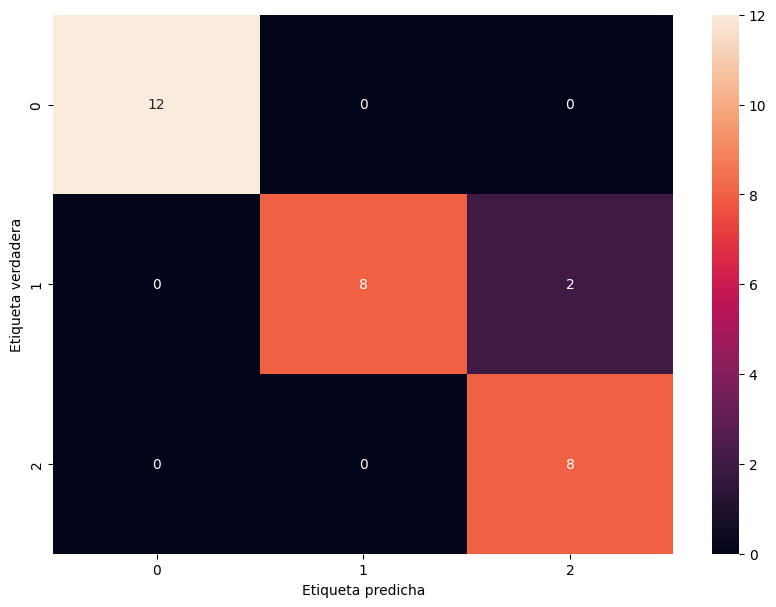

In [174]:


# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualización de la matriz
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

Dado el siguiente objetivo para el ejercicio:

"El objetivo será proponer la estructura de una red neuronal artificial que proporcione una precisión elevada del conjunto de prueba (> 85%)".

Podemos afirmar que el modelo propuesto cumple.

**Nota** Los resultados pueden variar debido a la naturaleza estocástica del algoritmo o del procedimiento de evaluación, o a las diferencias en la precisión numérica. Considerad la posibilidad de ejecutar el ejercicio varias veces y comparad el resultado medio.

# 03 Ejercicio: Problema de clasificación multiclase de diferentes artículos de ropa y calzados <a id="topic3"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio utilizaremos el conjunto de datos de *Fashion-MNIST* que viene precargado en la librería de Keras. Os dejo el enlace al repositorio de GitHub [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist).

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en venta de ropa y zapatos. EL conjunto de datos contiene 70000 imágenes en escala de grises en 10 categorías. Las imágenes muestran prendas individuales de ropa en baja resolución (28x28 píxeles). Se van a utilizar 60000 imágenes para entrenar la red y 10000 imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes.

Por tanto, se trata de un problema de clasificación multiclase, lo que significa que hay más de dos clases que predecir, de hecho, vamos a considerar diez clases de artículos de ropa. El objetivo será proponer la estructura de una red neuronal de convolución que proporcione una precisión elevada del conjunto de prueba (> 80%). En el caso de que no se alcance en la primera aproximación tendréis que tomar medidas para mejorar el proceso de diseño y entrenamiento de la red en cuestión hasta alcanzar dicho objetivo.

**03 Solución ejercicio: Problema de clasificación multiclase de diferentes artículos de ropa y calzados**

Veamos paso a paso como resolvemos dicho ejercicio.

**Paso 1: Preparación de los datos**

Como siempre, antes de empezar a programar nuestra red neuronal debemos importar todas las librerías que se van a requerir (y asegurarnos de que estamos ejecutando la versión correcta de TensorFlow en nuestro Colab).

In [178]:
# Cargamos las librerías necesarias
# %tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [179]:
# Cargamos el conjunto de datos precargados en Keras
fashion_mnist = keras.datasets.fashion_mnist

### Preparación del dataset

El método load_data() devuelve dos tuplas, una para el conjunto de entrenamiento y otra para el de test.

1. La tupla del conjunto de entrenamiento se compone de dos arrays: uno con las imágenes que va a entrenar y otra con las etiquetas de las imágenes reales que servirán durante el proceso de retropropagación para comprobar si la red está aprendiendo correctamente.
   
2. La segunda tupla contiene el dataset con las imágenes de test y las etiquetas reales de las imágenes de test. Cuando llegue el momento de hacer las predicciones, una vez el modelo esté entrenado, bastará con confrontar la predicción vs la etiqueta de test real.

### Preparación de un dataset con imágenes

En caso de que nosotros querásemos preparar nuestro propio dataset de imágenes, utilizaríamos el ImageGenarator facilitado por Keras:

    ```python
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    ```

**Nota**: para más detalles sobre como clasificar imágenes, consultar los datasets de Animals.



In [180]:
# Obtenemos el conjunto de train y test preparado



(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Como podéis observar la carga del conjunto de datos devuelve cuatro matrices Numpy. Las matrices *train_images* y *train_labels* son el conjunto de entrenamiento. Las matrices *test_images* y *test_labels* son el conjunto de prueba para evaluar la precisión del modelo.

Las imágenes son matrices NumPy de 28x28 píxeles, con valores que van de 0 a 255. Las etiquetas son una matriz de enteros, que van de 0 a 9. Estos corresponden a la clase de ropa que representa la imagen:

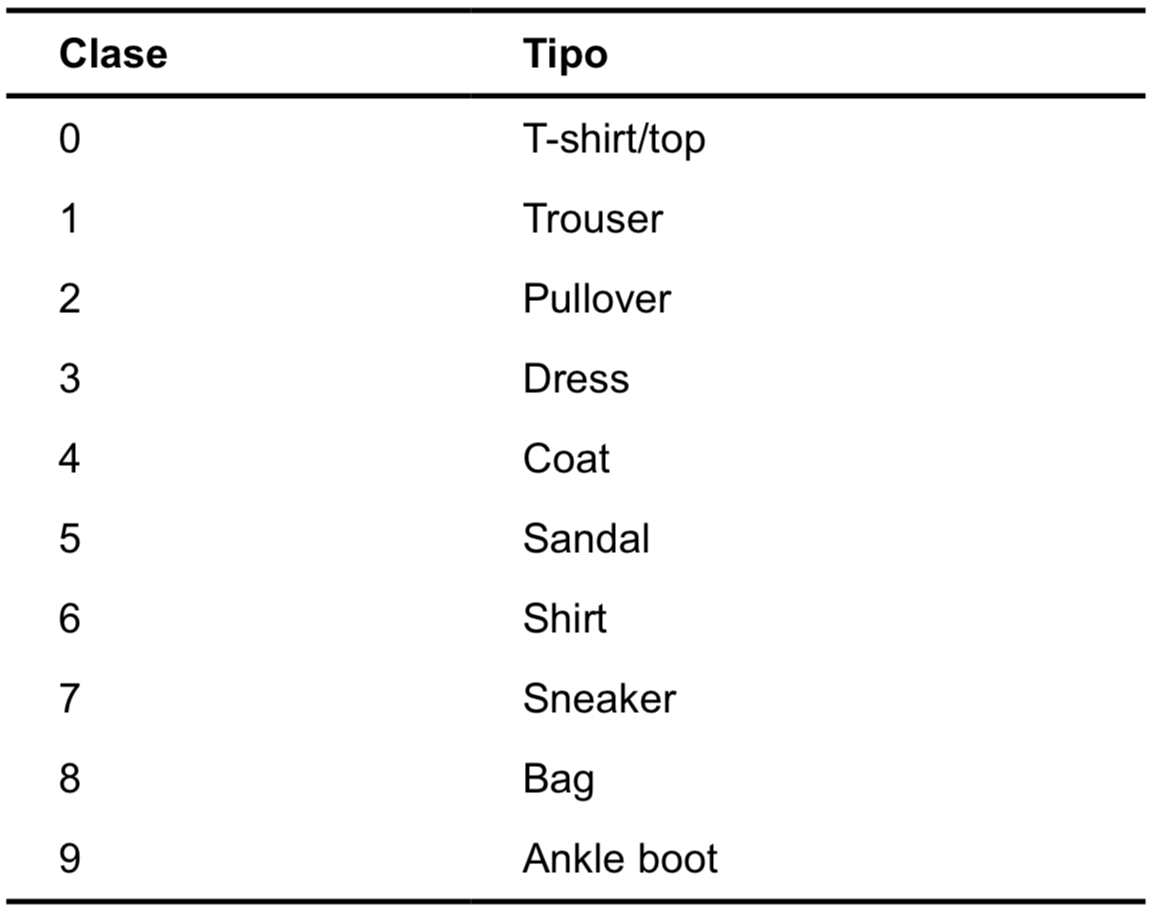

### Dado que los nombres de clase no se incluyen con el conjunto de datos, podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes:

In [181]:
# Clases de ropa consideradas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [182]:
# Vamos a escalar los valores de entrada en el rango 0-1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


In [183]:
# Recordar que es una buena práctica comprobar que los datos tienen la forma que esperamos

print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [184]:
# y que las muestras y etiquetas son los valores que esperamos
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

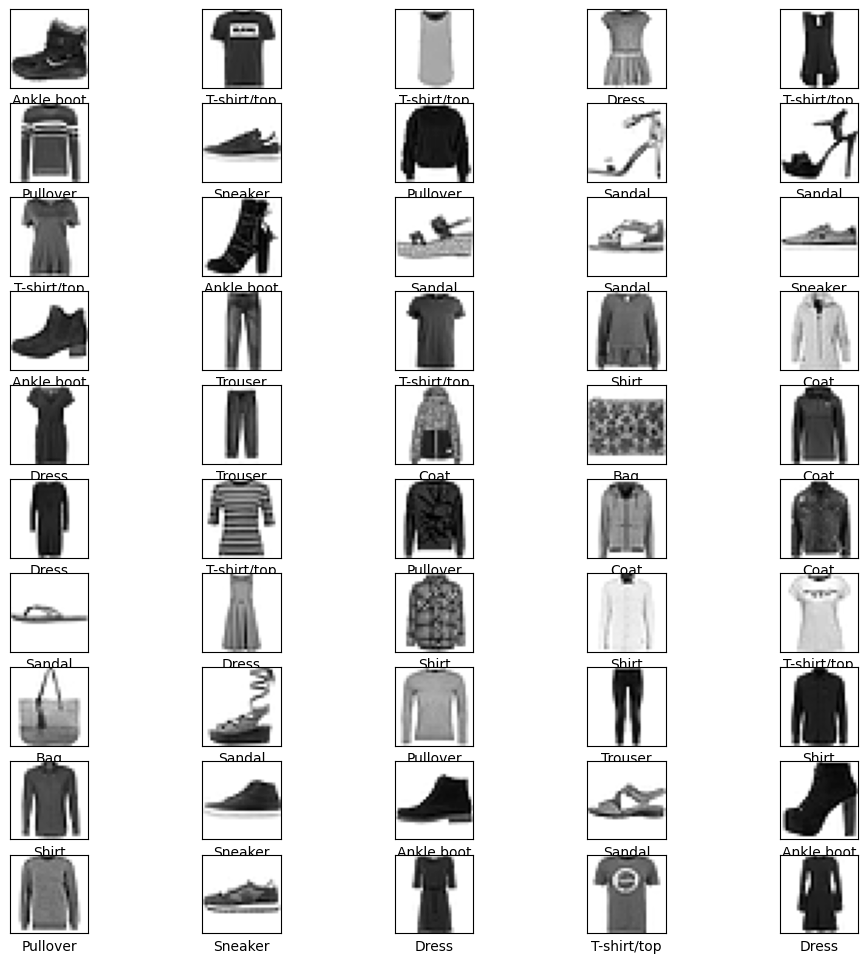

In [185]:
# Visualización las 50 primeras imágenes del conjunto de datos Fashion-MNIST
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Paso 2: Definimos la arquitectura de la red neuronal**

Tened en cuenta que Keras nos facilita el paso de reconvertir las muestras de entrada de 28×28 a un vector (array) de 784 números (concatenando fila a fila) con el uso de la capa *keras.layers.Flatten()*. Podemos comprobar con el método *summary()* que esta capa no requiere parámetros para aplicar la transformación (columna Param #). En general, siempre usaremos esta capa del modelo para hacer esta operación en lugar de redimensionar el tensor de datos antes de la entrada.


In [216]:
# Cargamos las librerías necesarias para configurar la red
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [187]:
# Definimos la arquitectura de la red utilizada
model = Sequential()

#Comenzamos aplanando la imagen de 28x28 en un vector de 28*28 
model.add(Flatten(input_shape=(28, 28)))

# Primera capa densa
model.add(Dense(10, activation='sigmoid'))

# 10 nodos de salida, uno para cada posible categoría
model.add(Dense(10, activation='softmax'))


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [188]:
# Hacemos un summary de la red considerada
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

**Paso 3: Compilamos la arquitectura de la red neuronal definida**

Antes de que el modelo esté listo para ser entrenado, se requiere especificar el valor de algunos argumentos del método de compilación. Los parámetros que utilizamos son los conocidos para este tipo de problemas de clasificación multiclase. En particular, recordar que en este paso se especifica la función de coste (loss) que dirige el entrenamiento del modelo en la dirección correcta durante el proceso de entrenamiento. También especificamos el tipo de optimización que usaremos para actualizar los parámetros del modelo durante el proceso de aprendizaje. Y, finalmente, se indica la métrica que se usará para monitorizar los pasos de entrenamiento y testing. En este ejercicio nuevamente proponemos usar la precisión (accuracy), es decir, la fracción de las imágenes que están clasificadas correctamente.

In [189]:
# Compilamos el modelo con SGD
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Paso 4: Entrenamiento del modelo de red neuronal utilizado**

Ahora el modelo ya está listo para entrenar mediante el método fit(), actualizando los parámetros de tal manera que aprenda a asociar imágenes a etiquetas. Como se puede observar, a medida que el modelo entrena, se muestran las métricas de loss y accuracy.

En este caso (pueden cambiar los valores cuando ustedes lo probéis) este modelo alcanza una precisión de, aproximadamente, 0.7951 (o 79.5 %) en los datos de entrenamiento, pasando todas las imágenes por la red neuronal 5 veces (5 épocas, o epochs).

In [190]:
# Realizamos el proceso de entrenamiento sobre el conjunto de train
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3461 - loss: 2.0535
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6544 - loss: 1.3144
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6998 - loss: 1.0197
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7274 - loss: 0.8770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7457 - loss: 0.8005
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7548 - loss: 0.7448
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.7738 - loss: 0.6918
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7867 - loss: 0.6567
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7971 - loss: 0.6220
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8035 - loss: 0.6012


**Paso 5: Evaluación del modelo de red neuronal utilizado**

El siguiente paso es comparar el rendimiento del modelo en el conjunto de datos de prueba. Vemos que es aproximadamente la misma precisión que en los datos de entrenamiento. Buenas noticias!! No existe el sobreajuste.

In [191]:
# Realizamos el proceso de validación sobre el conjunto de test con model.evaluate para obtener pérdida y accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.6014


In [192]:
# Obtenemos por pantalla el resultado
print('Test accuracy:', test_acc)

Test accuracy: 0.79830002784729


**Paso 6: Predicciones del modelo de red neuronal utilizado**

Con el modelo entrenado, podemos empezar a usarlo para hacer predicciones sobre algunas imágenes (usemos por comodidad alguna de las imágenes de prueba que ya tenemos cargadas en el notebook). En predictions vamos a almacenar la predicción de la etiqueta para cada imagen en el conjunto de prueba. Echemos un vistazo a la primera predicción:

In [193]:
# Guardamos las predicciones realizadas sobre el conjunto de test
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [194]:
index = 5


# Obtenemos la información sobre una de las predicciones obtenidas
"""
Esto nos devuelve un array con las probabilidades asignadas a cada etiqueta. 
Como se puede comprobar, el índice[1] del array tiene una probabilidad del 82%.
"""
predictions[index]

array([2.3029186e-03, 9.4334877e-01, 4.4178772e-03, 1.7142136e-02,
       1.9049373e-02, 7.0401463e-03, 3.8899386e-03, 1.5853257e-03,
       3.4791743e-04, 8.7554392e-04], dtype=float32)

In [195]:
# Se puede ver qué etiqueta tiene el valor de confianza más alto con la función argmax

"""
argmax nos devuelve el índice de la etiqueta con la probabilidad más alta (para no tener que buscarlo manualmente).
"""
mas_probable = np.argmax(predictions[index])
print(mas_probable, '--->' ,class_names[mas_probable])
print ("valor real: ", test_labels[index])

1 ---> Trouser
valor real:  1


El modelo está más seguro de que esta imagen son unos pantalones (Trouser) ya que nos reporta una clase igual a 1. Al examinar la etiqueta que le corresponde muestra que esta clasificación es correcta ya que es igual a 1 también.

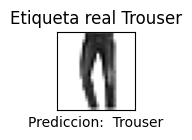

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [196]:
plt.figure(figsize=(12,12))

plt.subplot(10,5,index)
plt.title("Etiqueta real " + class_names[test_labels[index]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.xlabel(f"Prediccion:  {class_names[mas_probable]}")
plt.show()
print(class_names)

**Paso 7: Mejora del modelo de red neuronal utilizado**

Podemos observar que la precisión obtenida de este modelo para estos datos (que suele rondar el 75-80 %) dista mucho de ser la mejor de las que podemos obtener. Tener en cuenta que no hay una solución única para todos los problemas, sino que cada problema requiere su propia solución. Intentemos, por ejemplo, cambiar el optimizador usado.

Recordemos que el optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. Una elección bastante habitual es el optimizador *sgd*, pero hay más como sabemos, como por ejemplo el optimizador *Adam*, que a veces puede hacer converger mejor el proceso de optimización. Vamos a probar.

In [209]:


#! CAMBIAR EL CÓDIGO

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [210]:
# Compilamos el modelo de la red que queremos mejorar con ADAM
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [199]:
# Realizamos el proceso de entrenamiento sobre el conjunto de train considerando el nuevo modelo de red neuronal
model.fit(train_images, train_labels, epochs=25)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3738 - loss: 1.6703
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6239 - loss: 1.0225
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6552 - loss: 0.9667
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6694 - loss: 0.9403
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6757 - loss: 0.9192
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6796 - loss: 0.9053
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6806 - loss: 0.8957
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6894 - loss: 0.8746
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6899 - loss: 0.8773
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6957 - loss: 0.8636
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7047 - loss: 0.8452
Epoch 12/50
1875/1875 ━━━━━━━━

In [200]:
# Realizamos el proceso de validación sobre el conjunto de test el nuevo modelo de red neuronal
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7989 - loss: 0.5857


In [201]:
# Obtenemos por pantalla el resultado
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.7968000173568726

Test loss: 0.5905009508132935


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6497 - loss: 0.9926 - val_accuracy: 0.8037 - val_loss: 0.5542
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8281 - loss: 0.4900 - val_accuracy: 0.8269 - val_loss: 0.4949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8436 - loss: 0.4390 - val_accuracy: 0.8388 - val_loss: 0.4602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8500 - loss: 0.4207 - val_accuracy: 0.8347 - val_loss: 0.4654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8549 - loss: 0.4084 - val_accuracy: 0.8409 - val_loss: 0.4538
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8582 - loss: 0.3988 - val_accuracy: 0.8422 - val_loss: 0.4414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.3908 - val_accuracy: 0.8437 - val_loss: 0.4372
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8618 - loss: 0.3816 - 

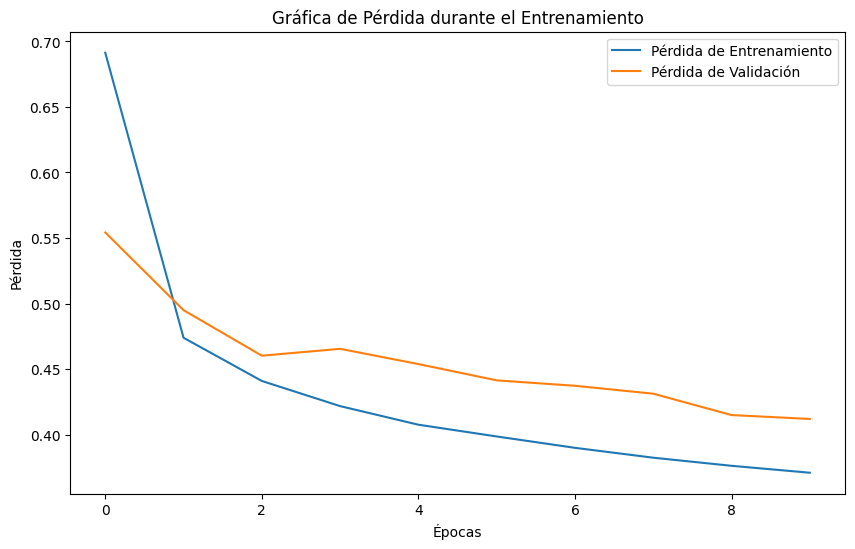

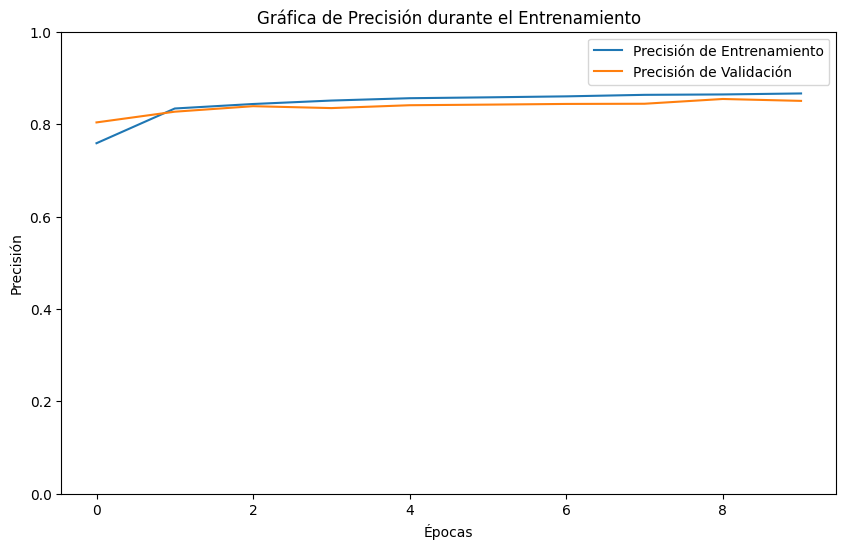

In [211]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Graficar la pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Gráfica de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Gráfica de Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1]) 
plt.legend()
plt.show()

Como vemos, cambiando solo el optimizador ya hemos mejorado casi un 9 % adicional la precisión del modelo. Esto nos hace pensar que hay muchos elementos a tener en cuenta cuando definimos y configuramos el proceso de aprendizaje de una red neuronal. Lo cual nos ofrece motivación para continuar probando con diferentes parámetros e hiperparámetros en el proceso de aprendizaje y validación.

### Implementación de maxpooling

Para resolver este problema, vamos a imitar la propuesta vista en la UF_5(Redes neuronales y Deep Learning). Concretamente, vamos a contemplar el caso de AlexNet, que tiene las siguientes características:

1. Utilia funciones de activación con 5 capas convolucionales.
2. Utiliza 3 capas de pooling.
3. Utiliza un clasificador de softmax.


La capa de pooling se utiliza para reducir la dimensionalidad de los datos de entrada. En nuestro caso, vamos a utilizar una capa de pooling de 2x2, que reducirá la dimensionalidad de los datos de entrada a la mitad. Esto significa que la capa de pooling reducirá la cantidad de parámetros en la red neuronal, lo que puede ayudar a reducir el sobreajuste y mejorar el rendimiento del modelo.

In [222]:
model_2 = Sequential()

# Primera capa convolucional
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Tercera capa convolucional (opcional)
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamiento para pasar a las capas densas
model_2.add(Flatten())

# Primera capa densa
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(10, activation='softmax'))


model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Conv2D: Capa Convolucional. 

Conv2D es una capa convolucional que aplica filtros o kernels a la imagen de entrada para detectar características o patrones específicos, como bordes, texturas y formas. El objetivo de la convolución es reducir la imagen original a una forma más compacta que resuma la información relevante para la tarea de clasificación, mientras que se preservan las características importantes.

Parámetros importantes:

1. Número de filtros (32): Especifica cuántos filtros utilizará la capa. Cada filtro detectará diferentes características en la imagen. En este caso, hay 32 filtros.
2. Tamaño del filtro (3, 3): Determina el tamaño del área que el filtro examina de la imagen. Un filtro de 3x3 explora una pequeña ventana de 3 píxeles por 3 píxeles en la imagen.
3. Activación ('relu'): Es una función de activación que introduce no linealidad en el modelo, ayudando a aprender relaciones más complejas.
input_shape=(28, 28, 1): Define el tamaño de la entrada (en este caso, una imagen de 28x28 píxeles con 1 canal de color, que representa imágenes en escala de grises).


### Qué hace la capa:

La capa convolucional aplica cada filtro a la imagen de entrada, creando un mapa de características que destaca patrones específicos.
Cada filtro genera un nuevo mapa de características, y el resultado se utiliza como entrada para la siguiente capa de la red.




# MaxPooling2D: Capa de Pooling

MaxPooling2D es una capa que reduce la dimensión espacial de los mapas de características generados por la capa convolucional.vSu objetivo es disminuir el tamaño de las representaciones intermedias y, al mismo tiempo, resaltar las características más importantes.


Parámetros importantes:

1. pool_size=(2, 2): Especifica el tamaño de la ventana de pooling (en este caso, 2x2). Para cada bloque de 2x2 en el mapa de características, se selecciona el valor máximo.

### Qué hace la capa:

La operación de max-pooling toma la ventana 2x2 de la imagen y selecciona el valor máximo, reduciendo así el tamaño del mapa de características. Esto se conoce como subsampling.

Al reducir la dimensionalidad, también ayuda a que la red sea más robusta frente a pequeñas variaciones y translaciones en las imágenes de entrada.


# ¿Por qué se intercalan Conv2D y MaxPooling2D?

Intercalar las capas Conv2D y MaxPooling2D es una práctica común en las redes neuronales convolucionales por varias razones:

-Extracción de características jerárquicas: Las capas convolucionales (Conv2D) extraen características importantes de la imagen, mientras que las capas de pooling (MaxPooling2D) reducen el tamaño del mapa de características y ayudan a retener solo las características más relevantes.

-Reducción de dimensionalidad: Las capas de max-pooling disminuyen la cantidad de parámetros y el tamaño de los datos, lo que reduce la carga computacional y previene el sobreajuste.

-Mejora de la eficiencia: Intercalar estas capas hace que el modelo sea más eficiente, ya que reduce el número de cálculos necesarios en capas posteriores, lo que también acelera el proceso de entrenamiento.

-Robustez ante variaciones: Max-pooling ayuda a que el modelo sea menos sensible a pequeñas variaciones en la posición de las características en las imágenes.

### Resumen del Flujo

-Conv2D: Detecta patrones locales en la imagen (por ejemplo, bordes, texturas).

-MaxPooling2D: Reduce la resolución de la imagen y retiene solo las características más importantes.

Este patrón se repite varias veces en una red convolucional para que las capas más profundas puedan capturar patrones cada vez más complejos.


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6696 - loss: 0.8975 - val_accuracy: 0.8248 - val_loss: 0.4689
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8377 - loss: 0.4575 - val_accuracy: 0.8567 - val_loss: 0.3915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8651 - loss: 0.3739 - val_accuracy: 0.8730 - val_loss: 0.3437
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8820 - loss: 0.3297 - val_accuracy: 0.8811 - val_loss: 0.3270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8935 - loss: 0.2996 - val_accuracy: 0.8865 - val_loss: 0.3194
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9032 - loss: 0.2695 - val_accuracy: 0.8931 - val_loss: 0.3010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9085 - loss: 0.2522 - val_accuracy: 0.8904 - val_loss: 0.3100
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9140 - loss

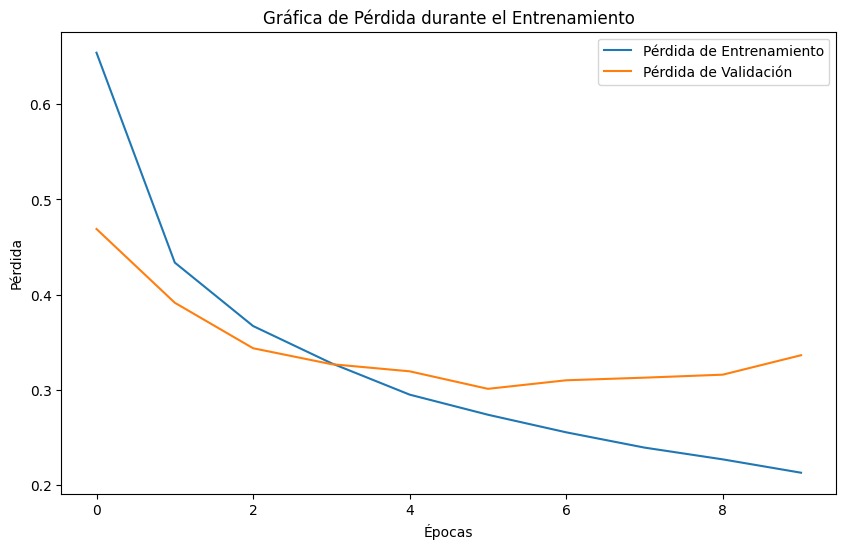

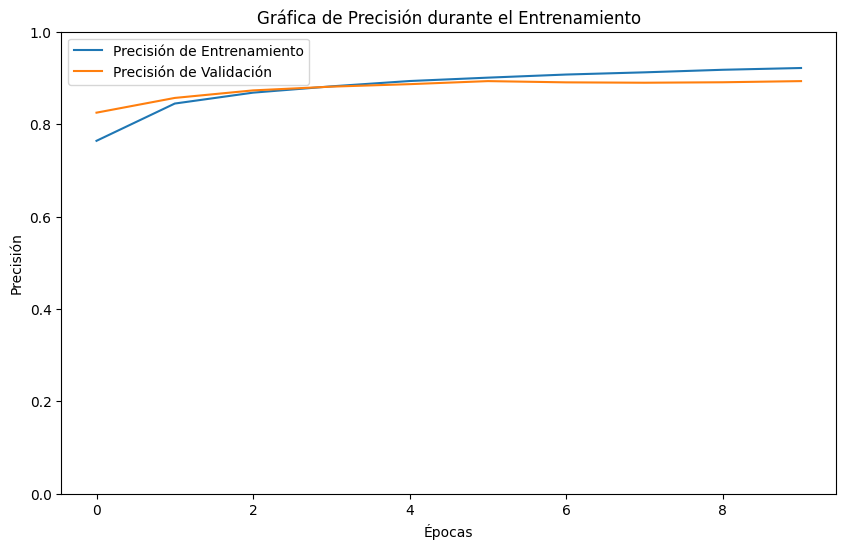

In [220]:
history_2 = model_2.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Graficar la pérdida
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_2.history['val_loss'], label='Pérdida de Validación')
plt.title('Gráfica de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_2.history['val_accuracy'], label='Precisión de Validación')
plt.title('Gráfica de Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1]) 
plt.legend()
plt.show()